## Simple Linear Regression

 ##### Connect to internet and import pandas,numpy,matplotlib,scikit-learn,seaborn. 

In [2]:
# Step-0: Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# Step1: Read the dataset (from folder)
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

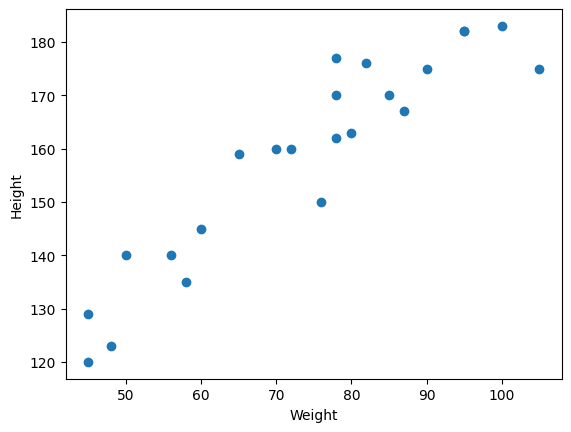

In [4]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [5]:
# Step-2: EDA-Exploratory Data Analysis. 
df.info() # Check the data types and non-null counts
          # output: # 1.Index Range-> RangeIndex: 10000 entries, 0 to 9999
                    # 2.Columns-> 3 columns: 'Index', 'Height', 'Weight'
                    # 3.Non-Null Count-> 'Index'-> 10000 non-null, 'Height'-> 10000 non-null, 'Weight'-> 10000 non-null
                    # 4.Dtype-> 'Index'-> int64, 'Height'-> float64, 'Weight'-> float64
                    # 5.Memory Usage->How much memory dataframe takes in bytes-> 500.0 KB 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [6]:
df.describe() # Get summary statistics
              # This function gives descriptive statistics(mean, std, min, 25%, 50%, 75%, max) for numerical columns in the dataframe. 
              # Defaultly, it includes only numerical columns(int,float).
              # If you use df.describe(incude="all") -> it also includes non-numeric columns(object,category,bool). 
              # For numeric columns: (count,mean,std,min,25%,50%,75%,max)
              # For object columns/non-numeric column(when include ="all"): (count,unique,top,freq)

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [7]:
df.isnull().sum() # Check for missing values

Weight    0
Height    0
dtype: int64

Text(0, 0.5, 'Frequency')

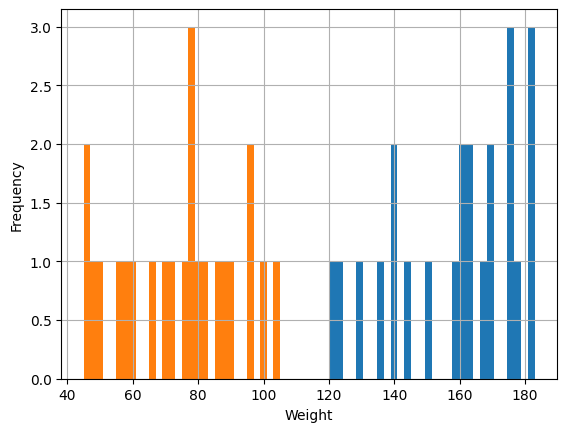

In [8]:
df['Height'].hist(bins=30) # Histogram of Height
plt.xlabel("Height")
plt.ylabel("Frequency")
df['Weight'].hist(bins=30) # Histogram of Weight
plt.xlabel("Weight")
plt.ylabel("Frequency")

In [9]:
# Step-3: Divide our dataset into independent and dependent features. 
X=df[['Weight']] ## idnependent feature
y=df['Height'] ##dependent features

In [ ]:
# (rows,columns)
X.shape,y.shape # x.shape -> give dimensions of your features matrix -> like (n_samples,n_features), eg: (23,1) has 23 rows and 1 columns. 
                # y.shape -> gives the dimensions of your target vector -> like (n_samples,) a 1D array with one label per row. 
                # Rule: x.shape[0]==y.shape[0] (the number of samples must match). 

((23, 1), (23,))

In [ ]:
# Step-4: TRAIN-TEST split. 
from sklearn.model_selection import train_test_split # Training set: used to train(fit) the model. 
                                                     # Test set -> used to evaluate the model's performance on unseen data.  

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.20,random_state=42)  
# test_size=0.20 -> 20% of the data goes into the test set, 80% into the train set. 
# random_state =42 -> ensures reproducibilty ( so you get the same split every time). 


In [ ]:
X_train.shape,X_test.shape # (n_samples,n_features),(n_samples,n_features)

((18, 1), (5, 1))

In [ ]:
y_train.shape,y_test.shape # (n_samples,n_features), (n_samples,) 

((18,), (5,))

In [ ]:
# Step-5: Standardization. 
# Standardization means rescaling your features so that they have: mean=0, standard deviation = 1. 
# This helps models (like logistic Regression,SVM,Neural Nets,KMeans,PCA,etc.) converge faster and treat all features on the same scale. 
from sklearn.preprocessing import StandardScaler 

In [ ]:
scaler=StandardScaler() # Now you have a scaler object that you can use to fit and transform your data. 
# Fit ONLY on training data(scaler.fit(x_train))-> prevents data leakage from the test set. 
# Transform both Train & Test using the same scaler.  
# After standardization: 
      # x_train_scaled.mean() = 0
      # x_train_scaled.std()=1                        

In [ ]:
X_train=scaler.fit_transform(X_train) # fit() -> learns the mean & std from the training data. 
                                      # transform() -> applies (x-mean)/std.  #scaling.
                                      # Fit_transform -> does both in one step ( Use ONLY on training data). 

In [ ]:
X_test=scaler.transform(X_test)  
# it applies the scaling (or other preprocessing) using parameters(mean,std) learned during .fit() 
# For, StandardScaler, it uses the mean and std that were learned from the training data.    
# formula applied: x_scaled = (x-mean)/std   .

In [ ]:
X_test #scaled

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

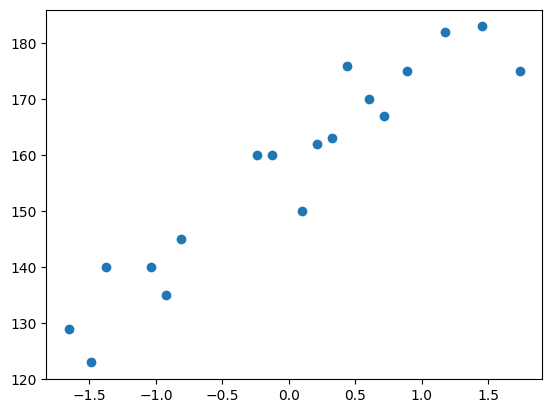

In [ ]:
plt.scatter(X_train,y_train) #--> #1.Visualize relationships b/w i/p & o/p. #2. Check linearity #3.DEtect outliers. 
# It plots the training data points with:
  # -> X_train on the x-axis(features). 
  # -> y_train on the y-axis(target variable/labels). 
# If x_train has multiple features (2D array), you can ONLY scatter plot one feature vs y at a time. 
# eg: plt.scatter(x_train[:,0],y_train) to plot feature 0 against target. 

In [21]:
scaler.transform([[80]])

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [ ]:
# Step-6: Model Training

from sklearn.linear_model import LinearRegression
# LinearRegression ia a class in scikit-learn that implements ordinary least squares(OLS) regression. 
# It finds the best-fitting line(or hyperplane) that minimizes the sum of squared errors b/w predicted and actual values. 


In [ ]:
regressor=LinearRegression() # Create a FRESH linear regression model with default settings. 
# Why the parentheses () ?
  # -> LinearRegression(without ()) is just the class definition.
  # ->LinearRegression(with()) calls the constructor -> creates a new object/instance you can use (here we call it model). 
# Default settings : 
  # LinearRegression(fit_intercept=True,copy_X=True,n_jobs=None,positive=False)

In [ ]:
## Training on the train data . 
regressor.fit(X_train,y_train) #Trains the model using the training data. 
# It computes the best coefficients(slopes) and intercept using Ordinary Least Squares. 

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
regressor.intercept_ # bias term (where the line crosses y-axis). 

np.float64(157.5)

In [ ]:
regressor.coef_ # slope(s) for each feature. 

# If regressor.intercept_ = 1.9 and regressor.coef_ = 0.7 
# -> meaning the models learned : y = 0.7x + 1.9  . 

array([17.03440872])

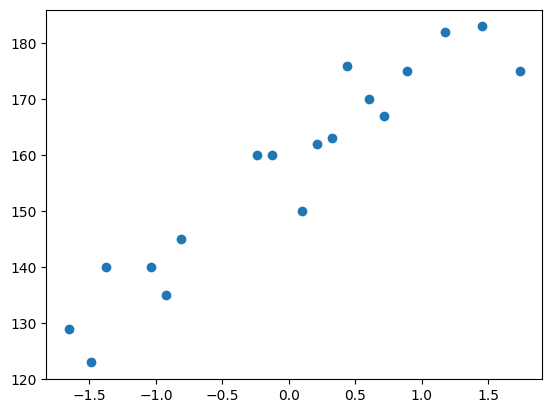

In [ ]:
# Step-7: Creating best fit line using x_train,y_train. 
plt.scatter(X_train,y_train) 

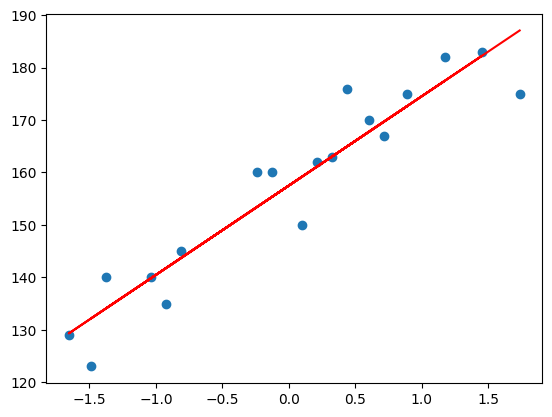

In [ ]:
# Step-7: Creating best fit line using x_train,y_train. 
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r') #after training. 
# X_train --> x-axis(feature values from training set). 
# regressor.predict(X_train) --> predicted y-values(line of best fit). 
# 'r' -> plot the line in red. 

### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =157.5 + 17.03(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =157.5 + 17.03(X_test)

In [ ]:
# Step-8: Prediction on  x test data. 
## Prediction for test data
y_pred_test=regressor.predict(X_test) #predicted values model gives for the test features(x_test). 

In [30]:
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [ ]:
y_test # The true labels/targets from the test set(ground truth). 

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

## Performance Metrics MAE,MSE,RMSE

In [32]:
# Step-9: ## Performance Metrics MAE,MSE,RMSE(cost functions). 
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [33]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


## Accuracy of the model R squared and Adjusted r ssquared
## R square
Formula

**R^2 = 1 - SSR/SST**


- R^2	=	Accuracy of the model
- SSR	=	sum of squares of residuals
- SST	=	total sum of squares

In [34]:
# Step-10: ## Performance Metrics R^2 and Adjusted R^2. 
from sklearn.metrics import r2_score

In [35]:
score=r2_score(y_test,y_pred_test)
score

0.776986986042344

## Adjusted r square
**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

- R2: The R2 of the model
- n: The number of observations
- k: The number of predictor variables

In [36]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [37]:
# Step-11: Checking for new data : 
scale_weight = scaler.transform([[80]])
regressor.predict([scale_weight[0]]) #2D array to 1D array . 

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([163.01076266])

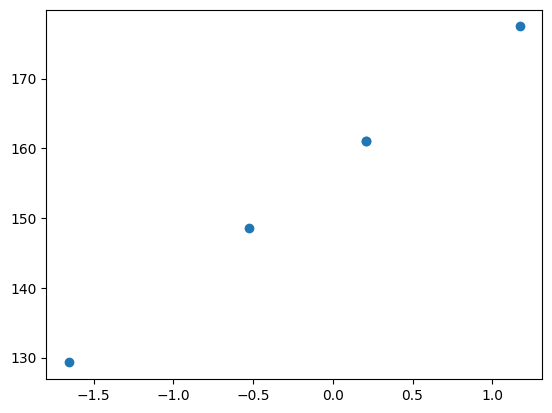

In [38]:
# Step-12: ASSUMPTIONS:  
#1.
plt.scatter(X_test,y_pred_test) # Linear distributed -> very good prediction. 


In [39]:
#2
residuals = y_test-y_pred_test

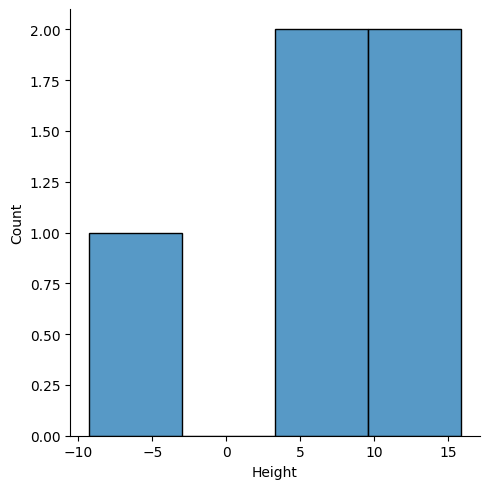

In [40]:
import seaborn as sns 
residuals = y_test-y_pred_test
sns.displot(residuals) # Normal Distributed -> very good prediction. 

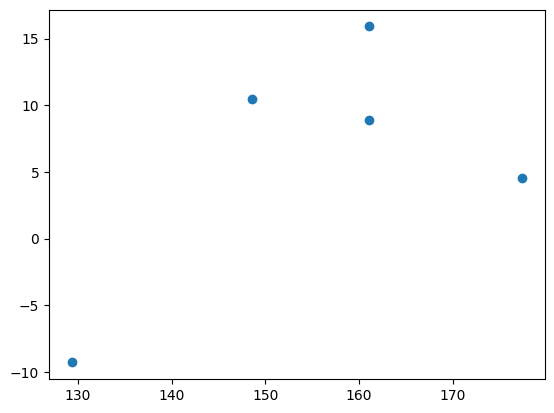

In [41]:
#3
plt.scatter(y_pred_test,residuals) # Uniform distribution -> very good prediction. 


## Pickling
Python pickle module is used for serialising and de-serialising a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What pickle does is that it “serialises” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

In [ ]:
# Step-13: Pickling the model.(For deployment purpose) 
 
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(regressor,open('regressor.pkl','wb'))

In [ ]:
model_regressor=pickle.load(open('regressor.pkl','rb')) # for direct prediction.  
model_regressor.predict(X_test) # gives wrong prediction  bcz data (x_test) is not scaled. 


array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [ ]:
# model_regressor.predict(X_test) & model_regressor.predict(standard_scaler.transform(X_test)) has diff prediction. 
#-> when you train with scaled data, your model learns weights based on those scaled values. 
# -> model_regressor.predict(X_test), without scaling -> you are giving the model raw values it never saw in training. 
# -> Predictions will be wrong (like 161.08467086) .
# -> Instead, you must transform test data with the same scaler used on training: model_regressor.predict(standard_scaler.transform(X_test)).
# -> That gives the correct prediction, becaue now the test data is in the same "scale space" as the training data. 
#correct prediction: 86.16975108. 

# THE GOLDEN RULE:
# 1.Fit scaler on training data.
# 2.Train model on scaled training data.
# 3.Transform test data with the same scaler. (never fit_transform on the test set - only transform). 

In [44]:
standard_scaler=pickle.load(open('scaler.pkl','rb'))

In [ ]:
model_regressor.predict(standard_scaler.transform(X_test))# correct prediction. 

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([86.16975108, 86.16975108, 84.37302922, 87.09533506, 85.46195156])

##### The difference you're seeing(161 vs. correct value(86)) is because one prediction used unscaled data, while the other used scaled data(which matches training). 

In [46]:
scaler

,copy,True
,with_mean,True
,with_std,True


In [47]:
regressor

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False
